In [1]:
# Necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import pinv
from numpy.random import multivariate_normal as mvnrnd

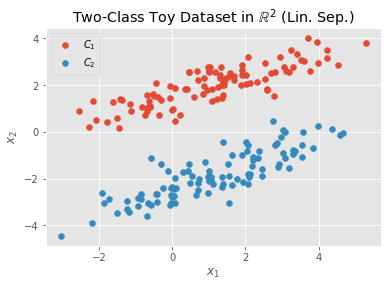

In [2]:
# 100 points per cluster
numpoints = 100;

# First cluster (C1)
mu1 = np.array([1, 2])
sigma = np.array([[3, 1.5], [1.5, 1]])
C1 = mvnrnd(mu1, sigma, numpoints)

# Second cluster (C2)
mu2 = np.array([1, -2])
C2 = mvnrnd(mu2, sigma, numpoints)

# Make scatterplot of two clusters
plt.style.use('ggplot')
fig, ax = plt.subplots()
labels = [r'$C_1$', r'$C_2$']
ax.set_title(r'Two-Class Toy Dataset in $\mathbb{R}^2$ (Lin. Sep.)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.scatter(C1[:,0], C1[:,1], label=labels[0])
ax.scatter(C2[:,0], C2[:,1], label=labels[1])
ax.legend()

In [3]:
fig.savefig('scatter')

In [4]:
# Make least-squares classifier (Bishop, p.184-185)
X_tilde = np.insert(np.vstack((C1, C2)), obj=0, values=1, axis=1)
C1_t = np.array([np.ones(numpoints), np.zeros(numpoints)])
C1_t = C1_t.T
C2_t = C1_t[:, [1, 0]]
T = np.vstack((C1_t, C2_t))
W_tilde = pinv(X_tilde) @ T
w_dec = W_tilde[:, 0] - W_tilde[:, 1] # dec = "decision"
x = np.linspace(-4, 6, 10000)
y = (-w_dec[0] - w_dec[1] * x) / w_dec[2]

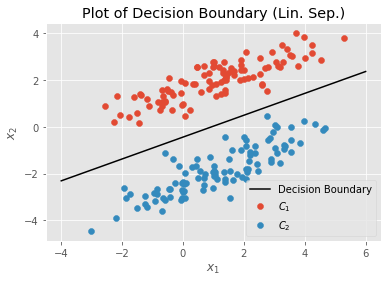

In [5]:
# Plot decision boundary
fig, ax = plt.subplots()
ax.set_title(r'Plot of Decision Boundary (Lin. Sep.)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.scatter(C1[:,0], C1[:,1], label=labels[0])
ax.scatter(C2[:,0], C2[:,1], label=labels[1])
ax.plot(x, y, color='black', label='Decision Boundary')
ax.legend()

In [6]:
fig.savefig('scatter_boundary')

In [7]:
# Label each prediction with its "true" class
X_tilde = X_tilde.T
y_w_labels = np.array([T[:, 1], np.dot(w_dec, X_tilde)]).T

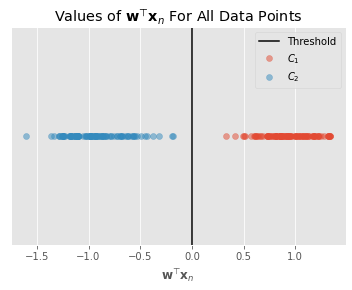

In [8]:
# Plot threshold
fig, ax = plt.subplots()
ax.set_title(r'Values of $\mathbf{w}^\top \mathbf{x}_n$ For All Data Points')
ax.set_xlabel(r'$\mathbf{w}^\top \mathbf{x}_n$')
for i in range(2):
    ax.scatter(y_w_labels[y_w_labels[:, 0] == i, 1], np.zeros(numpoints), label=labels[i], alpha=0.5)
plt.axvline(0, color='black', label='Threshold')
plt.yticks([]) # Remove y-axis labels since this is a 1-D plot
ax.legend()

In [9]:
fig.savefig('scatter_threshold')

In [10]:
w_dec

array([ 0.21210259, -0.22579011,  0.48239143])

In [11]:
# Create outliers
# Regular C2 data
C2_reg = mvnrnd(mu2, sigma, numpoints // 2)

mu_out = np.array([6, -6])
sigma_out = np.array([[0.5, 0], [0, 0.5]])
# Outlier C2 data
C2_out = mvnrnd(mu_out, sigma_out, numpoints // 2)
# Combine into single dataset
C2 = np.vstack((C2_reg, C2_out))

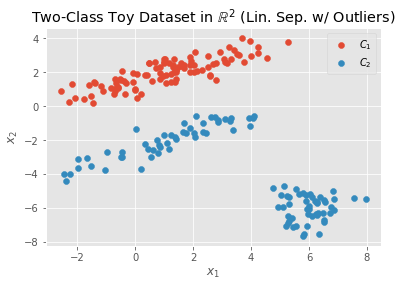

In [12]:
# Make scatterplot of two clusters
fig, ax = plt.subplots()
ax.set_title(r'Two-Class Toy Dataset in $\mathbb{R}^2$ (Lin. Sep. w/ Outliers)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.scatter(C1[:,0], C1[:,1], label=labels[0])
ax.scatter(C2[:,0], C2[:,1], label=labels[1])
ax.legend()

In [13]:
fig.savefig('scatter_out')

In [14]:
# Make decision boundary as above
X_tilde = np.insert(np.vstack((C1, C2)), obj=0, values=1, axis=1)
C1_t = np.array([np.ones(numpoints), np.zeros(numpoints)])
C1_t = C1_t.T
C2_t = C1_t[:, [1, 0]]
T = np.vstack((C1_t, C2_t))
W_tilde = pinv(X_tilde) @ T
w_dec = W_tilde[:, 0] - W_tilde[:, 1] # dec = "decision"
x = np.linspace(-4, 8, 10000)
y = (-w_dec[0] - w_dec[1] * x) / w_dec[2]

In [15]:
# Label each prediction with its true class
X_tilde = X_tilde.T
y_w_labels = np.array([T[:, 1], np.dot(w_dec, X_tilde)]).T

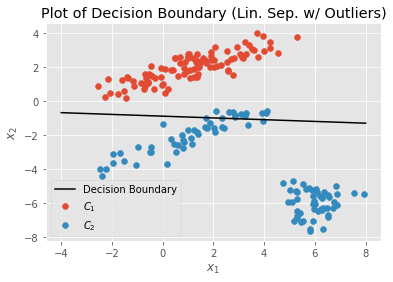

In [16]:
# Plot decision boundary; note that it misclassifies a few points now
fig, ax = plt.subplots()
ax.set_title(r'Plot of Decision Boundary (Lin. Sep. w/ Outliers)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.scatter(C1[:,0], C1[:,1], label=labels[0])
ax.scatter(C2[:,0], C2[:,1], label=labels[1])
ax.plot(x, y, color='black', label='Decision Boundary')
ax.legend()

In [17]:
fig.savefig('scatter_out_boundary')

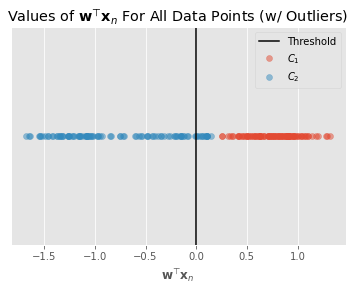

In [18]:
# Plot threshold
fig, ax = plt.subplots()
ax.set_title(r'Values of $\mathbf{w}^\top \mathbf{x}_n$ For All Data Points (w/ Outliers)')
ax.set_xlabel(r'$\mathbf{w}^\top \mathbf{x}_n$')
for i in range(2):
    ax.scatter(y_w_labels[y_w_labels[:, 0] == i, 1], np.zeros(numpoints), label=labels[i], alpha=0.5)
plt.axvline(0, color='black', label='Threshold')
plt.yticks([]) # Remove y-axis labels since this is a 1-D plot
ax.legend()

In [19]:
fig.savefig('scatter_out_threshold')

In [20]:
w_dec

array([0.2308714 , 0.01344384, 0.25996854])